In [1]:
import BasisFunction as bf
from ThirdOrderSurface import ThirdOrderSurface
from LinearRegression import LinearRegressor
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

<Figure size 432x288 with 0 Axes>

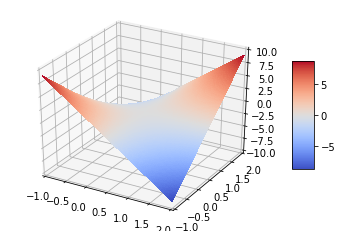

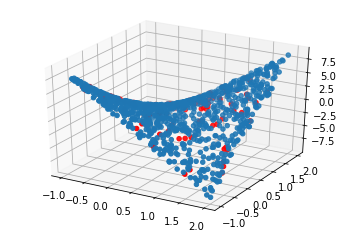

In [17]:
surf = ThirdOrderSurface(
                            (-1, 2, 100), (-1, 2, 100), (-10, 10), 
                            [lambda a: 1 - 2*a[:, 0] - 2*a[:, 1] + 4*np.multiply(a[:, 0], a[:, 1])]
                        )
surf.plot(True)
X, t = surf.genGaussianNoisyPoints(1000, 1)

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(X[:, 0].ravel(), X[:, 1].ravel(), t.ravel())


basisFuncs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: np.multiply(x[:, 0], x[:, 1]),
    lambda x: np.power(x[:, 0], 2),
    lambda x: np.power(x[:, 1], 2),
    lambda x: np.multiply(np.power(x[:, 0], 2), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 2), x[:, 0]),
    lambda x: np.power(x[:, 0], 3),
    lambda x: np.power(x[:, 1], 3),
]
xTest, tTest = surf.genGaussianNoisyPoints(100, 1)

XBasisFunc = bf.BaseBasicFunction(X, basisFuncs)
XTestBasisFunc = bf.BaseBasicFunction(xTest, basisFuncs)

regressor = LinearRegressor(XBasisFunc.generate(), t).fit()
yhat = regressor.predict(XTestBasisFunc.generate())

ax.scatter(xTest[:, 0].ravel(), xTest[:, 1].ravel(), yhat.ravel(), c = 'r')